In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

In [75]:
df = pd.read_csv('resources/tmdb-movies.csv')

### Investigation:

<hr>

How has popularity changed over time?

**Hypothesis**: With the increase in movie releases over time, the normalized popularity of movies would decrease over time because of the increase in available options. 

In [76]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Group total popularity by year
<hr>

**Steps** :

* Sum popularity in a release year groupby object
* Get a count of movies released in each year
* Normalize the popularity for each year by how many movies were released in that year
* Plot for insight

In [77]:
year_pop = df.groupby(['release_year']).sum()['popularity'].rename('popularity')
year_count = df.groupby(['release_year']).count()['id']
norm_pop = (year_pop/year_count).rename('popularity').reset_index()
norm_pop.head().style.hide_index()

release_year,popularity
1960,0.458932
1961,0.422827
1962,0.454783
1963,0.502706
1964,0.412428


Text(0.5, 1.0, 'Average Popularity of Movies by Release Year')

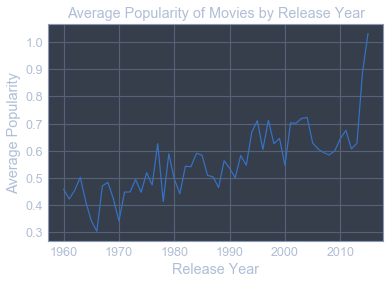

In [78]:
plt.plot(norm_pop.release_year,norm_pop.popularity)
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.title("Average Popularity of Movies by Release Year")

### Conclusions:

<hr>

Based on the data, I have to reject my hypothesis.  Popularity sustained a steady increase over time with a rapid increase over the last ~5 years.  Clearly there are other factors at play and more investigation is needed.  

### Which Genres are most popular year to year?

<hr>



In [79]:
df.genres.value_counts().sort_values(ascending = False)
df.genres.describe()

count      10843
unique      2039
top       Comedy
freq         712
Name: genres, dtype: object

In [82]:
genre_pop_year = df.groupby(['genres','release_year']).sum()['popularity'].sort_values(ascending = False)
genre_pop_year.sort_values(ascending=False).unstack().head()
#genre_pop_year.plot.bar()

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres,,,,,,,,,,,,,,,,,,,,,
Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.132952,0.71354,1.172718,2.216591,3.528692,2.290032,1.291659,0.832849,4.584457,6.767273
Action|Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.431609,0.383637,4.020478,1.021441
Action|Adventure|Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238102,NaN,NaN,NaN,0.400305,NaN,NaN,0.590772,NaN,0.589472
Action|Adventure|Animation|Comedy|Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.370019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Action|Adventure|Animation|Comedy|Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What variables have the most effect on revenue

<hr>

Steps:

* Sort revenue to see if anything stands out
* Calculate correlation between variables to determine (based on our data) which variables are positively and negatively impacting revenue.


Cleanup:

* Drop ID as not related to data
* Drop revenue_adj and revenue as ~1:1 correlation known and not helpful for this analysis


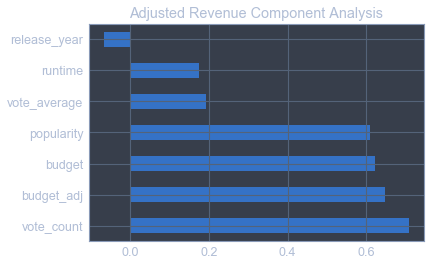

In [80]:
top_revenue = df.sort_values(by=['revenue_adj'],ascending=False)
revenue_corr = top_revenue.corr()['revenue_adj'].sort_values(ascending = False).\
    drop(['id','revenue_adj','revenue'])
revenue_corr.plot.barh(title = 'Adjusted Revenue Component Analysis',)

### Analysis

<hr>

Some notes about insight:

* While this effectively shows the relationship between variables, causality is not shown.  i.e. budget may impact revenue, whereas popularity may be impacted more by revenue than the inverse.